In [1]:
%cd /home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux 
%cd test
!rm -rf *.jpg
!rm -rf unknown
!rm -rf sample


%cd /home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux 
%cd train
!rm -rf cats
!rm -rf dogs
!rm -rf *.jpg


%cd /home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux 
!rm -rf valid
!rm -rf results
!rm -rf sample/train/
!rm -rf sample/valid/

%cd /home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux 
!rmdir test
!rmdir train

%cd /home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux
!unzip -q test.zip
!unzip -q train.zip

/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux
/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/test
/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux
/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/train
/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux
/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux
/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux


In [2]:
%cd /home/ubuntu/courses/deeplearning1/nbs/lesson1
%pwd

/home/ubuntu/courses/deeplearning1/nbs/lesson1


u'/home/ubuntu/courses/deeplearning1/nbs/lesson1'

In [3]:
import os, sys
current_dir = os.getcwd()
LESSON_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir + '/data/redux'

In [4]:
sys.path.insert(1, os.path.join(sys.path[0], '..'))

from utils import *
from vgg16 import Vgg16

%matplotlib inline

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


## Action Plan
1. Create Validation and Sample sets
2. Rearrange image files into their respective directories
3. Finetune and Train model
4. Generate predictions
5. Validation predictions
6. Submit predictions to Kaggle

## Create validation set and sample

In [5]:
%cd $DATA_HOME_DIR
%mkdir valid
%mkdir results
%mkdir -p sample/train
%mkdir -p sample/test
%mkdir -p sample/valid
%mkdir -p sample/results
%mkdir -p test/unknown

/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux


In [6]:
!tree -d

.
├── results
├── sample
│   ├── results
│   ├── test
│   ├── train
│   └── valid
├── test
│   └── unknown
├── train
└── valid

10 directories


In [7]:
%cd $DATA_HOME_DIR/train

/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/train


In [8]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(2000) : os.rename(shuf[i], DATA_HOME_DIR + '/valid/' + shuf[i])

In [9]:
!echo ----Valid----
%ls ../valid | head -5 && ls ../valid  | tail -5 && ls ../valid  | wc -l
%ls | wc -l
# 2000 random files moved from /train to /valid
# /valid has 2000 files
# Now /train has 25000 - 2000 = 23000

----Valid----
cat.10024.jpg
cat.10057.jpg
cat.10064.jpg
cat.10075.jpg
cat.10081.jpg
ls: write error
dog.9941.jpg
dog.9961.jpg
dog.9967.jpg
dog.9999.jpg
dog.9.jpg
2000
23000


In [10]:
from shutil import copyfile

In [11]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(200) : copyfile(shuf[i], DATA_HOME_DIR + '/sample/train/' + shuf[i])

In [12]:
# Copied 200 files from /train to /sample/train
%ls ../sample/train/ | head -5 && ls ../sample/train/ | tail -5 && ls ../sample/train/| wc -l
%ls | wc -l
# /sample/train has 200 files
# /train has 23000 files

cat.10244.jpg
cat.10519.jpg
cat.10641.jpg
cat.10809.jpg
cat.10834.jpg
dog.9571.jpg
dog.9622.jpg
dog.9644.jpg
dog.9926.jpg
dog.9985.jpg
200
23000


In [13]:
%cd $DATA_HOME_DIR/valid

/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/valid


In [14]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(50) : copyfile(shuf[i], DATA_HOME_DIR + '/sample/valid/' + shuf[i])

In [15]:
# Copied 50 random files from /valid to /sample/valid
# /valid still has 2000 files, /sample/valid has 50
%ls | wc -l
%ls ../sample/valid/ | wc -l

2000
50


## Rearrange files into their respective directories

In [16]:
#Divide cat/dog images into separate directories

%cd $DATA_HOME_DIR/sample/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/sample/train


In [17]:
%cd $DATA_HOME_DIR/sample/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/sample/valid


In [18]:
%cd $DATA_HOME_DIR/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/valid


In [19]:
%cd $DATA_HOME_DIR/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/train


In [20]:
#Create single unknown class for test set
%cd $DATA_HOME_DIR/test
%mv *.jpg unknown/

/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/test


## Finetuning and Training

In [40]:
%cd $DATA_HOME_DIR

#Set path to sample/ path if desired
path = DATA_HOME_DIR + '/sample'
test_path = DATA_HOME_DIR + '/test/' #We use all the test data
results_path = DATA_HOME_DIR + '/results/'
train_path = path + '/train/'
valid_path = path + '/valid'

/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux


In [22]:
vgg = Vgg16()

In [23]:
#You can experiment with no_of_epochs to improve the model
batch_size = 64
no_of_epochs=3

In [24]:
#Finetune the model
batches = vgg.get_batches(train_path, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, batch_size=batch_size * 2)
vgg.finetune(batches)


Found 200 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [25]:
#Notice we are passing in the validation dataset to the fit() method
#For each epoch we test our model against the validation set
latest_weights_filename = None
for epoch in range(no_of_epochs):
    print "Running epoch %d" % epoch
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = 'ft%d.h5' % epoch
    vgg.model.save_weights(results_path + latest_weights_filename)
print "Completed %s fit operations" % no_of_epochs

Running epoch 0
Epoch 1/1
200/200 [==============================] - 7s - loss: 1.2426 - acc: 0.6150 - val_loss: 0.3446 - val_acc: 0.8400
Running epoch 1
Epoch 1/1
200/200 [==============================] - 7s - loss: 0.2649 - acc: 0.8850 - val_loss: 0.2128 - val_acc: 0.9000
Running epoch 2
Epoch 1/1
200/200 [==============================] - 7s - loss: 0.0619 - acc: 0.9750 - val_loss: 0.1737 - val_acc: 0.8800
Completed 3 fit operations


## Generate Predictions
### Let's use our new model to make predictions on the test dataset

In [26]:
batches, preds = vgg.test(test_path, batch_size = batch_size * 2)

Found 12500 images belonging to 1 classes.


In [27]:
# For every image, vgg.test() generates two probabilities
# based on how we've ordered the cats/dogs directories.
# It looks like column one is cats and column 2 is dogs
print preds[:5]

filenames = batches.filenames
print filenames[:5]

[[  1.0000e+00   2.4191e-06]
 [  9.3176e-01   6.8243e-02]
 [  9.9944e-01   5.5728e-04]
 [  1.0000e+00   5.6891e-07]
 [  3.8867e-04   9.9961e-01]]
['unknown/9292.jpg', 'unknown/12026.jpg', 'unknown/9688.jpg', 'unknown/4392.jpg', 'unknown/779.jpg']


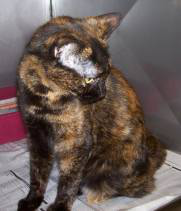

In [28]:
#You can verify the column ordering by viewing some images
from PIL import Image
Image.open(test_path + filenames[2])

In [29]:
results_path

'/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/results/'

In [30]:
# Save our test results arrays so we can use them again later
save_array(results_path + 'test_preds.dat', preds)
save_array(results_path + 'filenames.dat', filenames)

In [33]:
results_path + 'test_preds.dat'

'/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/results/test_preds.dat'

## Validate predictions
Keras' fit() function conveniently shows us the value of the loss function, and the accuracy, after every epoch ("epoch" refers to one full run through all training examples). The most important metrics for us to look at are for the validation set, since we want to check for over-fitting.

* Tip: with our first model we should try to overfit before we start worrying about how to reduce over-fitting - there's no point even thinking about regularization, data augmentation, etc if you're still under-fitting! (We'll be looking at these techniques shortly).

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:

1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (ie those with highest probability that are correct)
4. The most incorrect labels of each class (ie those with highest probability that are incorrect)
5. The most uncertain labels (ie those with probability closest to 0.5).

Let's see what we can learn from these examples. (In general, this is a particularly useful technique for debugging problems in the model. However, since this model is so simple, there may not be too much to learn at this stage.)

Calculate predictions on validation set, so we can find correct and incorrect examples:


In [34]:
vgg.model.load_weights(results_path+latest_weights_filename)

In [35]:
val_batches, probs = vgg.test(valid_path, batch_size = batch_size)

Found 50 images belonging to 2 classes.


In [36]:
filenames = val_batches.filenames
expected_labels = val_batches.classes #0 or 1

#Round our predictions to 0/1 to generate labels
our_predictions = probs[:,0]
our_labels = np.round(1-our_predictions)


In [45]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path + '/' + filenames[i]) for i in idx], titles=titles)
    
#Number of images to view for each visualization task
n_view = 4

In [46]:
valid_path

'/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/sample/valid'

Found 44 correct labels


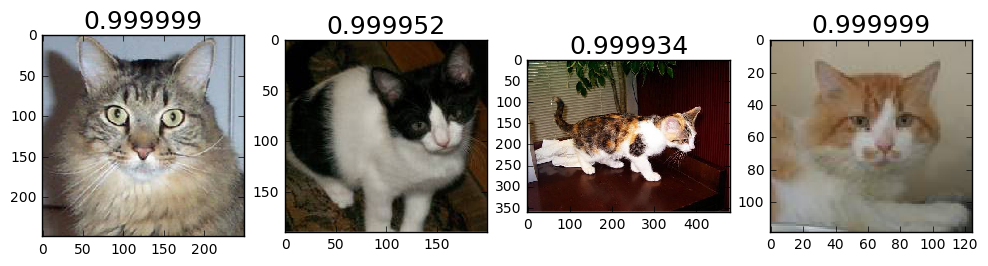

In [47]:
#1. A few correct labels at random
correct = np.where(our_labels==expected_labels)[0]
print "Found %d correct labels" % len(correct)
idx = permutation(correct)[:n_view]
plots_idx(idx, our_predictions[idx])

Found 6 incorrect labels


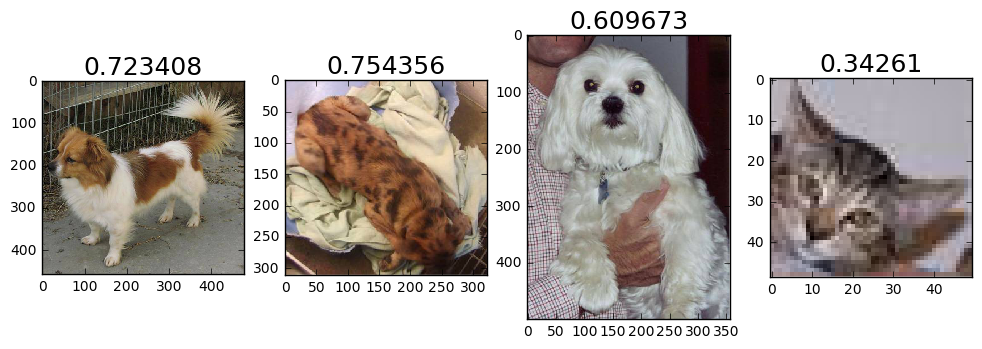

In [48]:
#2. A few incorrect labels at random
incorrect = np.where(our_labels!=expected_labels)[0]
print "Found %d incorrect labels" % len(incorrect)
idx = permutation(incorrect)[:n_view]
plots_idx(idx, our_predictions[idx])

Found 24 confident correct cats labels


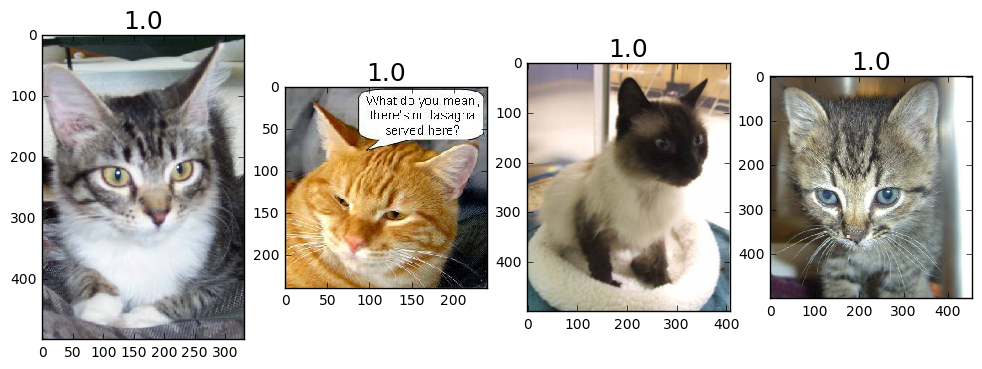

In [49]:
#3a. The images we most confident were cats, and are actually cats
correct_cats = np.where((our_labels==0) & (our_labels==expected_labels))[0]
print "Found %d confident correct cats labels" % len(correct_cats)
most_correct_cats = np.argsort(our_predictions[correct_cats])[::-1][:n_view]
plots_idx(correct_cats[most_correct_cats], our_predictions[correct_cats][most_correct_cats])

Found 20 confident correct dogs labels


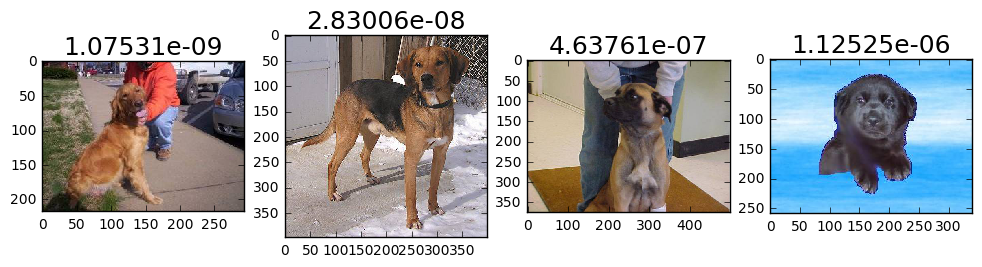

In [50]:
#3b. The images we most confident were dogs, and are actually dogs
correct_dogs = np.where((our_labels==1) & (our_labels==expected_labels))[0]
print "Found %d confident correct dogs labels" % len(correct_dogs)
most_correct_dogs = np.argsort(our_predictions[correct_dogs])[:n_view]
plots_idx(correct_dogs[most_correct_dogs], our_predictions[correct_dogs][most_correct_dogs])


In [ ]:


#4a. The images we were most confident were cats, but are actually dogs
incorrect_cats = np.where((our_labels==0) & (our_labels!=expected_labels))[0]
print "Found %d incorrect cats" % len(incorrect_cats)
if len(incorrect_cats):
    most_incorrect_cats = np.argsort(our_predictions[incorrect_cats])[::-1][:n_view]
    plots_idx(incorrect_cats[most_incorrect_cats], our_predictions[incorrect_cats][most_incorrect_cats])

